# Chain


In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

## Messages
채팅 모델은 대화 내 다양한 역할을 포착하는 메시지를 사용할 수 있다. <br>
<br>
LangChain은 HumanMessage, AIMessage, SystemMessage, ToolMessage 등 다양한 메시지 유형을 지원한다. <br>
<br>
이 메시지들은 사용자 메시지, 채팅 모델의 메시지, 채팅 모델의 동작 지시 메시지, 도구 호출 메시지를 각각 나타낸다.<br>
<br>
각 메시지는 다음과 같은 요소들을 포함할 수 있다:<br>
- content: 메시지의 내용<br>
- name: 선택적으로 메시지 작성자<br>
- response_metadata: 선택적으로 메타데이터(dict 형식, 예를 들어 AIMessages의 경우 모델 제공자가 자주 채워 넣음)<br>

In [3]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [AIMessage(content=f"So tou said you were researching ocean mammals?", name="Model")]
messages.extend([HumanMessage(content=f"Yes, that's right.", name="Lance")])
messages.extend([AIMessage(content=f"Great, what would you like to learn about.", name="Model")])
messages.extend([HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance")])

for m in messages:
    m.pretty_print()


================================== Ai Message ==================================
Name: Model

So tou said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


## Chat Models 
메시지 모델은 입력으로 메시지 시퀀스를 사용할 수 있으며, 위에서 설명한 메시지 유형을 지원한다. <br>
채팅 모델은 위에서 설명한 것처럼 메시지 시퀀스를 입력으로 사용하며 다양한 메시지 유형을 지원한다.

In [ ]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Enter the value for {var}: ")

_set_env("OPENAI_API_KEY")

채팅 모델을 불러와서 메시지 목록을 통해 호출할 수 있다. <br>
그 결과로, 특정 response_metadata를 가진 AIMessage가 반환되는 것을 확인할 수 있다.

In [ ]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")
result = llm.invoke(messages)

# 이건 어떤 함수?
type(result)

langchain_core.messages.ai.AIMessage

In [6]:
result

AIMessage(content='Orcas, also known as killer whales, are remarkable creatures that can be spotted in several locations along the US coastline. Here are some of the best places to see orcas in the US:\n\n1. **San Juan Islands, Washington**: This is one of the most popular and reliable places to see orcas in the wild. The best time is during the summer months when the salmon are abundant, attracting orcas to the area. \n\n2. **Puget Sound, Washington**: Close to the San Juan Islands, Puget Sound also offers opportunities to see orcas, especially from whale-watching tours departing from Seattle or nearby cities.\n\n3. **Southeastern Alaska**: Orcas can be seen throughout the year in the waters of southeastern Alaska. Areas around Juneau, Sitka, and Ketchikan are known for orca sightings, particularly from cruise ships or specialized whale-watching tours.\n\n4. **Monterey Bay, California**: Although orcas are not resident here, they can sometimes be spotted during certain times of the ye

In [ ]:
# 토큰 수는 얼마인지, 사용된 모델명은 무엇인지 등등 ... 여러 메타데이터를 확인할 수 있다.
result.response_metadata

{'token_usage': {'completion_tokens': 314,
  'prompt_tokens': 67,
  'total_tokens': 381,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_name': 'gpt-4o-2024-08-06',
 'system_fingerprint': 'fp_eb9dce56a8',
 'finish_reason': 'stop',
 'logprobs': None}

## Tools 
도구는 모델이 외부 시스템과 상호작용할 때 유용하다. <br>
외부 시스템(예: API)은 자연어 대신 특정 입력 스키마나 페이로드를 요구하는 경우가 많다. 예를 들어, API를 도구로 바인딩할 경우 모델은 요구되는 입력 스키마를 인지하게 된다. <br>
<br>
모델은 사용자의 자연어 입력에 기반하여 도구 호출을 선택하게 되며, 도구의 스키마에 맞는 결과를 반환한다.
<br>
많은 LLM 제공업체가 도구 호출을 지원하며, LangChain에서 도구 호출을 할 때는 tool 로 사용하기 위해 만든 Python 함수를 ChatModel.bind_tools(function)에 전달하기만 하면 된다.

In [ ]:

def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args: 
        a: first int
        b: second int
    """
    return a * b

# llm 에 tool 등록. 
llm_with_tools = llm.bind_tools([multiply])

In [9]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2 multipled by 3", name="Lance")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Mab9VDQWXZIy9ypMdBcEQv3T', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 63, 'total_tokens': 81, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-91ff74ff-c2e0-45c5-93c7-1784fb80d0ac-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_Mab9VDQWXZIy9ypMdBcEQv3T', 'type': 'tool_call'}], usage_metadata={'input_tokens': 63, 'output_tokens': 18, 'total_tokens': 81, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [ ]:

# 응답된 tool_call 에는 additional_kwargs 이라는 딕셔너리가 반환된다.
# additional_kwargs 딕셔너리에서 tool_calls 라는 키를 통해 도구 호출에 대한 구체적인 정보를 가져온다.
tool_call.additional_kwargs['tool_calls']

[{'id': 'call_Mab9VDQWXZIy9ypMdBcEQv3T',
  'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'},
  'type': 'function'}]

## Using messages as state
다음은 메시지를 상태로 활용하는 예시. <br>
그래프 상태에서 메시지를 사용할 수 있다. <br>
<br>
MessagesState라는 이름의 TypedDict를 단일 키인 messages로 구성해보고, 그래프를 완성해본다. <br>
<br>
여기서 messages는 앞서 정의한 (예: HumanMessage 등) 메시지들의 리스트입니다.

In [12]:
from typing import TypedDict
from langchain_core.messages import AnyMessage

class MessgesState(TypedDict):
    messages: list[AnyMessage]


## Reducers
각 노드는 상태 키인 messages에 대해 새로운 값을 반환하는데, 이 새로운 값은 기존의 messages 값을 덮어쓰게 되는 문제가 생긴다. <br>
<br>
그래프가 실행되는 동안, messages 상태 키에 메시지를 추가하고자 한다.<br>
이를 해결하기 위해 리듀서 함수를 사용할 수 있다.<br>
<br>
리듀서는 상태 업데이트가 어떻게 수행되는지 지정할 수 있게 해준다.<br>
리듀서 함수가 지정되지 않은 경우, 앞서 본 것처럼 해당 키의 업데이트는 덮어쓰기로 처리된다.<br>
하지만 메시지를 추가하기 위해서는 미리 만들어진 add_messages 리듀서를 사용할 수 있다.<br>
<br>
이 리듀서를 사용하면 기존 메시지 리스트에 새 메시지가 추가된다. <br>
단순히 messages 키에 add_messages 리듀서 함수를 메타데이터로 주석 처리해주면 된다.

In [17]:
from typing import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


메시지 리스트를 그래프 상태에 포함시키는 것은 매우 일반적이므로, LangGraph에는 미리 정의된 MessagesState가 제공된다  <br>

MessagesState는 다음과 같이 정의: <br>
- 미리 구축된 단일 messages 키를 가짐
- 이는 AnyMessage 객체들의 리스트임
- add_messages 리듀서를 사용함 <br>
<br>

보통은 앞서 설명한 사용자 정의 TypedDict보다 간결하기 때문에 MessagesState를 사용한다.

In [18]:
from langgraph.graph import MessagesState

class State(MessagesState):
    pass

그래프에서 MessagesState를 사용 테스트.<br>
<br>
"Hello!"라는 입력을 주면, LLM은 도구 호출 없이 응답. <br>
LLM은 입력이나 작업이 도구가 제공하는 기능을 필요로 한다고 판단할 때만 도구 호출을 한다.

In [15]:
# Initial state
initial_messages = [
    AIMessage(content="Hello! How can I assist you?", name="Model"),
    HumanMessage(content="I am looking for information on marine biology.", name="Lance")
]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically ara you interested in?", name="Model")

# Test 
add_messages(initial_messages, new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='1ca4f9c6-e671-4a45-8ae7-2b19d19fff94'),
 HumanMessage(content='I am looking for information on marine biology.', additional_kwargs={}, response_metadata={}, name='Lance', id='61d21233-21c1-43d0-9576-f2d123c4711f'),
 AIMessage(content='Sure, I can help with that. What specifically ara you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='23ca6f6b-9763-455c-aa5a-4d204858250e')]

## Our graph
그래프를 완성하고, 이미지로 확인해본다. <br>
테스트 실행을 통해 도구 호출이 의도대로 동작하는지 확인해본다. 

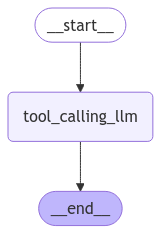

In [24]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# State 
class MessagesState(MessagesState):
    pass   

# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View 
display(Image(graph.get_graph().draw_mermaid_png()))

In [30]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
messages

{'messages': [HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={}, id='256058f7-aabb-4ba8-aa63-c21e3370cdbe'),
  AIMessage(content='Hi there! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 54, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'stop', 'logprobs': None}, id='run-e35475a0-f40a-4396-9802-2b890fd845e1-0', usage_metadata={'input_tokens': 54, 'output_tokens': 12, 'total_tokens': 66, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [31]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hi there! How can I assist you today?


In [26]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3!")})
messages

{'messages': [HumanMessage(content='Multiply 2 and 3!', additional_kwargs={}, response_metadata={}, id='e239317a-fe7b-48bc-b5f8-c16d0a7055b4'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_IepydK4IIxgncIjsXthOyuv5', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 59, 'total_tokens': 77, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f9f4fb6dbf', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d48365b2-b731-4d19-afbf-ea50e3ac7665-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_IepydK4IIxgncIjsXthOyuv5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 59, 'output_tokens': 

In [28]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3!
================================== Ai Message ==================================
Tool Calls:
  multiply (call_IepydK4IIxgncIjsXthOyuv5)
 Call ID: call_IepydK4IIxgncIjsXthOyuv5
  Args:
    a: 2
    b: 3
